<a href="https://colab.research.google.com/github/AlienX77-cmd/Computational-Finance/blob/main/Computational_Finance_Homework_ARIMA_6310505688_Kittipak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/nobitex/tvdatafeed

Defaulting to user installation because normal site-packages is not writeable

  Running command git clone --filter=blob:none --quiet https://github.com/nobitex/tvdatafeed 'C:\Users\Kittipak\AppData\Local\Temp\pip-req-build-e2hwn46s'



  Cloning https://github.com/nobitex/tvdatafeed to c:\users\kittipak\appdata\local\temp\pip-req-build-e2hwn46s
  Resolved https://github.com/nobitex/tvdatafeed to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [ ]:
from tvDatafeed import TvDatafeed
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [ ]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
username = 'xxx'
password = 'xxx'
#tv = TvDatafeed(username, password, chromedriver_path=None)
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [ ]:
now = datetime.now()
print("now =", now)
data=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=500)
data

now = 2023-10-11 00:07:40.491687


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-11-03 04:00:00,OANDA:XAUUSD,1788.000,1788.285,1758.890,1769.690,65614.0
2021-11-04 04:00:00,OANDA:XAUUSD,1769.690,1798.950,1769.645,1791.780,49706.0
2021-11-05 04:00:00,OANDA:XAUUSD,1791.780,1818.360,1785.060,1818.170,60851.0
2021-11-08 05:00:00,OANDA:XAUUSD,1818.170,1826.515,1812.495,1824.220,41143.0
2021-11-09 05:00:00,OANDA:XAUUSD,1824.220,1832.760,1819.190,1831.910,45955.0
...,...,...,...,...,...,...
2023-10-04 04:00:00,OANDA:XAUUSD,1822.905,1830.675,1816.640,1821.315,168620.0
2023-10-05 04:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-06 04:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima --quiet
import pmdarima as pm

In [ ]:
df = data['close']
df = pd.DataFrame(df)
df.tail(5)

,close
datetime,
2023-10-04 04:00:00,1821.315
2023-10-05 04:00:00,1820.300
2023-10-06 04:00:00,1832.035
2023-10-09 04:00:00,1861.405
2023-10-10 04:00:00,1861.910


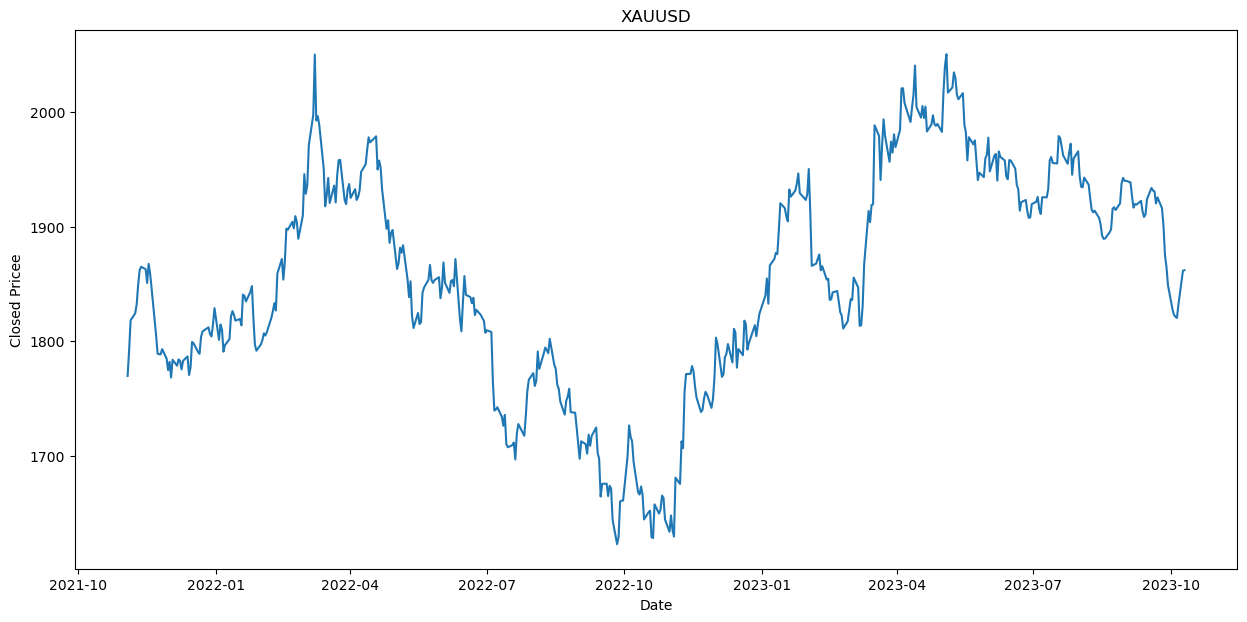

In [ ]:
# At first glance, there looks to be a positive trend

plt.figure(figsize=(15,7))
plt.title("XAUUSD")
plt.xlabel('Date')
plt.ylabel('Closed Pricee')
plt.plot(data['close'])
plt.show()

## <center> Rolling Statistics

A rolling average is a great way to visualize how the dataset is trending. As the dataset provides counts by month, a window size of 12 will give us the annual rolling average.

We will also include the rolling standard deviation to see how much the data varies from the rolling average.

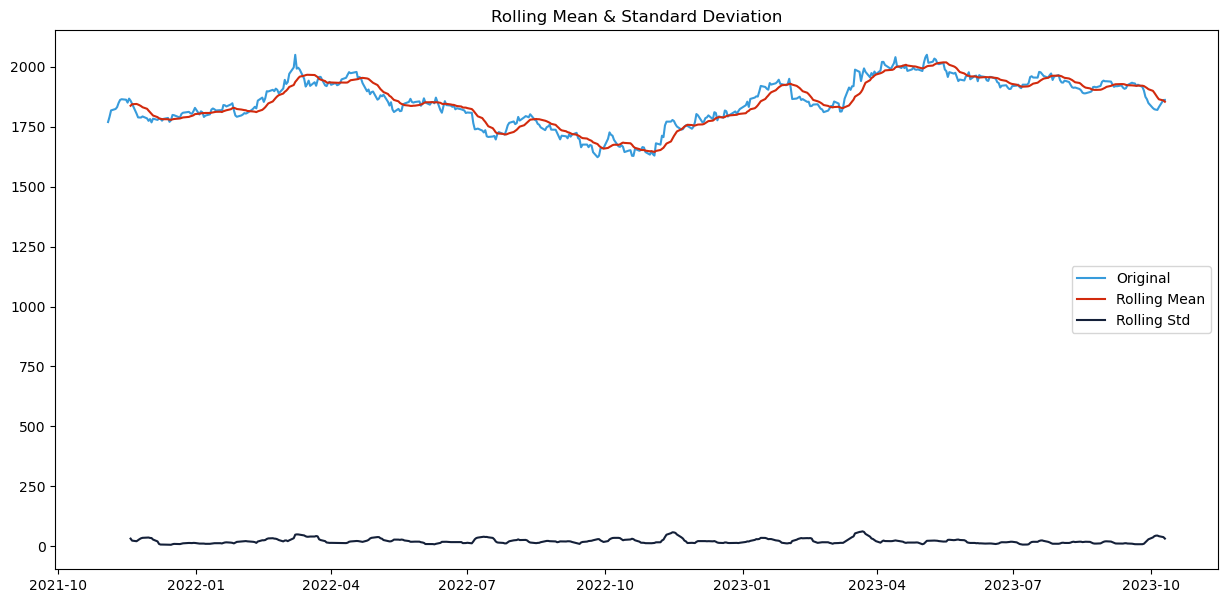

In [ ]:
# Determine rolling statistics
df["rolling_avg"] = df['close'].rolling(window=12).mean() # window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df['close'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["close"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## <center>Augmented Dickey–Fuller Test</center>

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

<B>Null Hypothesis:</B> The data is not stationary.

<B>Alternative Hypothesis:</B> The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

- p-value <= significance level (0.01, 0.05, 0.10, etc.)

If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

We can see in the ADF test below that the p-value is 0.302809, meaning that it is very likely that the data is not stationary.

In [ ]:
# Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.963486
p-value                          0.302809
#Lags Used                       4.000000
Number of Observations Used    495.000000
Critical Value (1%)             -3.443630
Critical Value (5%)             -2.867397
Critical Value (10%)            -2.569889
dtype: float64


In [ ]:
df1 = data['close']
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.head(5)

0    1769.69
1    1791.78
2    1818.17
3    1824.22
4    1831.91
Name: close, dtype: float64

Let’s difference the series and see how the autocorrelation plot looks like.

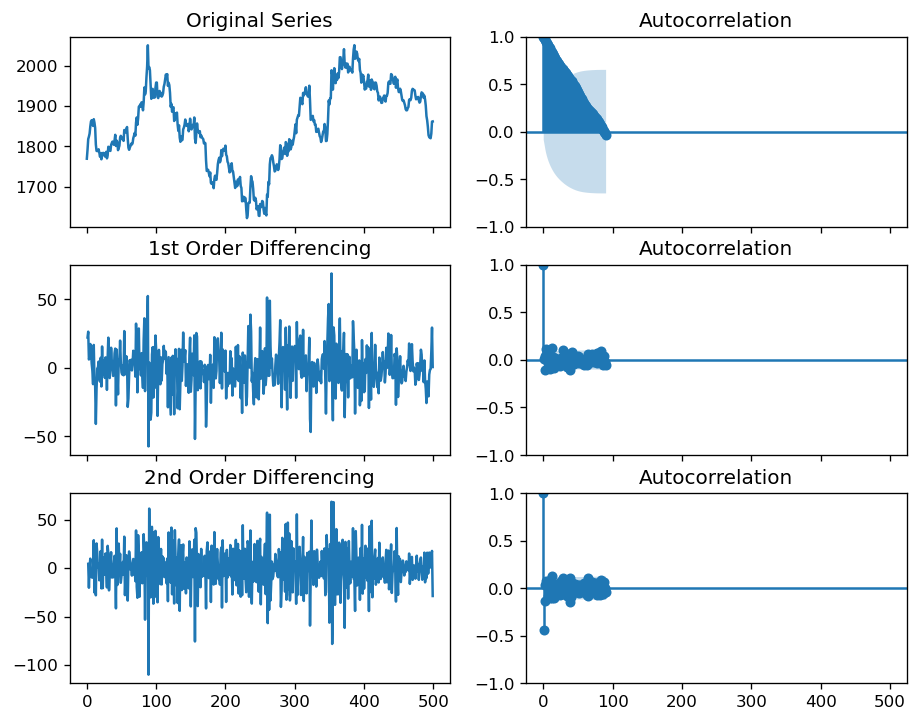

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1); axes[0, 0].set_title('Original Series')
plot_acf(df1, ax=axes[0, 1], lags=90)

# 1st Differencing
axes[1, 0].plot(df1.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.diff().dropna(), ax=axes[1, 1], lags=90)

# 2nd Differencing
axes[2, 0].plot(df1.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.diff().diff().dropna(), ax=axes[2, 1], lags=90)

plt.show()

## <center>ARIMA Model Selection w/ Auto-ARIMA</center>

Although our data is almost certainly not stationary (p-value = 0.302809), let's see how well a standard ARIMA model performs on the time series

Using the auto_arima function from the `pmdarima` package, we can perform a parameter search for the optimal values of the model.


IMPORTANT NOTE:
- When we print out the model summary after training, the header will be SARIMAX regardless of what model parameters we use. If we set the seasonality to FALSE or the m parameter to 1 then we have a standard ARIMA model. This will be what we train first. See this Stack Overflow question for more information --> [auto_arima(... , seasonal=False) but got SARIMAX?](https://stackoverflow.com/questions/69528507/auto-arima-seasonal-false-but-got-sarimax)

In [ ]:
# Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['close'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4187.856, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4192.868, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4194.780, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4194.757, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4190.934, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4193.168, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4193.928, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4192.340, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4191.573, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4185.918, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4192.821, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4192.844, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4191.235, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

## <center>Model Diagnostics</center>

Four plots result from the plot_diagnostics function. The Standardized residual, Histogram plus KDE estimate, Normal q-q, and a correlogram.

We can interpret the model as a good fit based on the following conditions.

Standardized residual
- There are no obvious patterns in the residuals, with values having a mean of zero and having a uniform variance.

Histogram plus KDE estimate
- The KDE curve should be very similar to the normal distribution (labeled as N(0,1) in the plot)

Normal Q-Q
- Most of the data points should lie on the straight line

Correlogram (ACF plot)
- 95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. In our case, there are a few values outside of this area, and therefore we may need to add more predictors to make the model more accurate

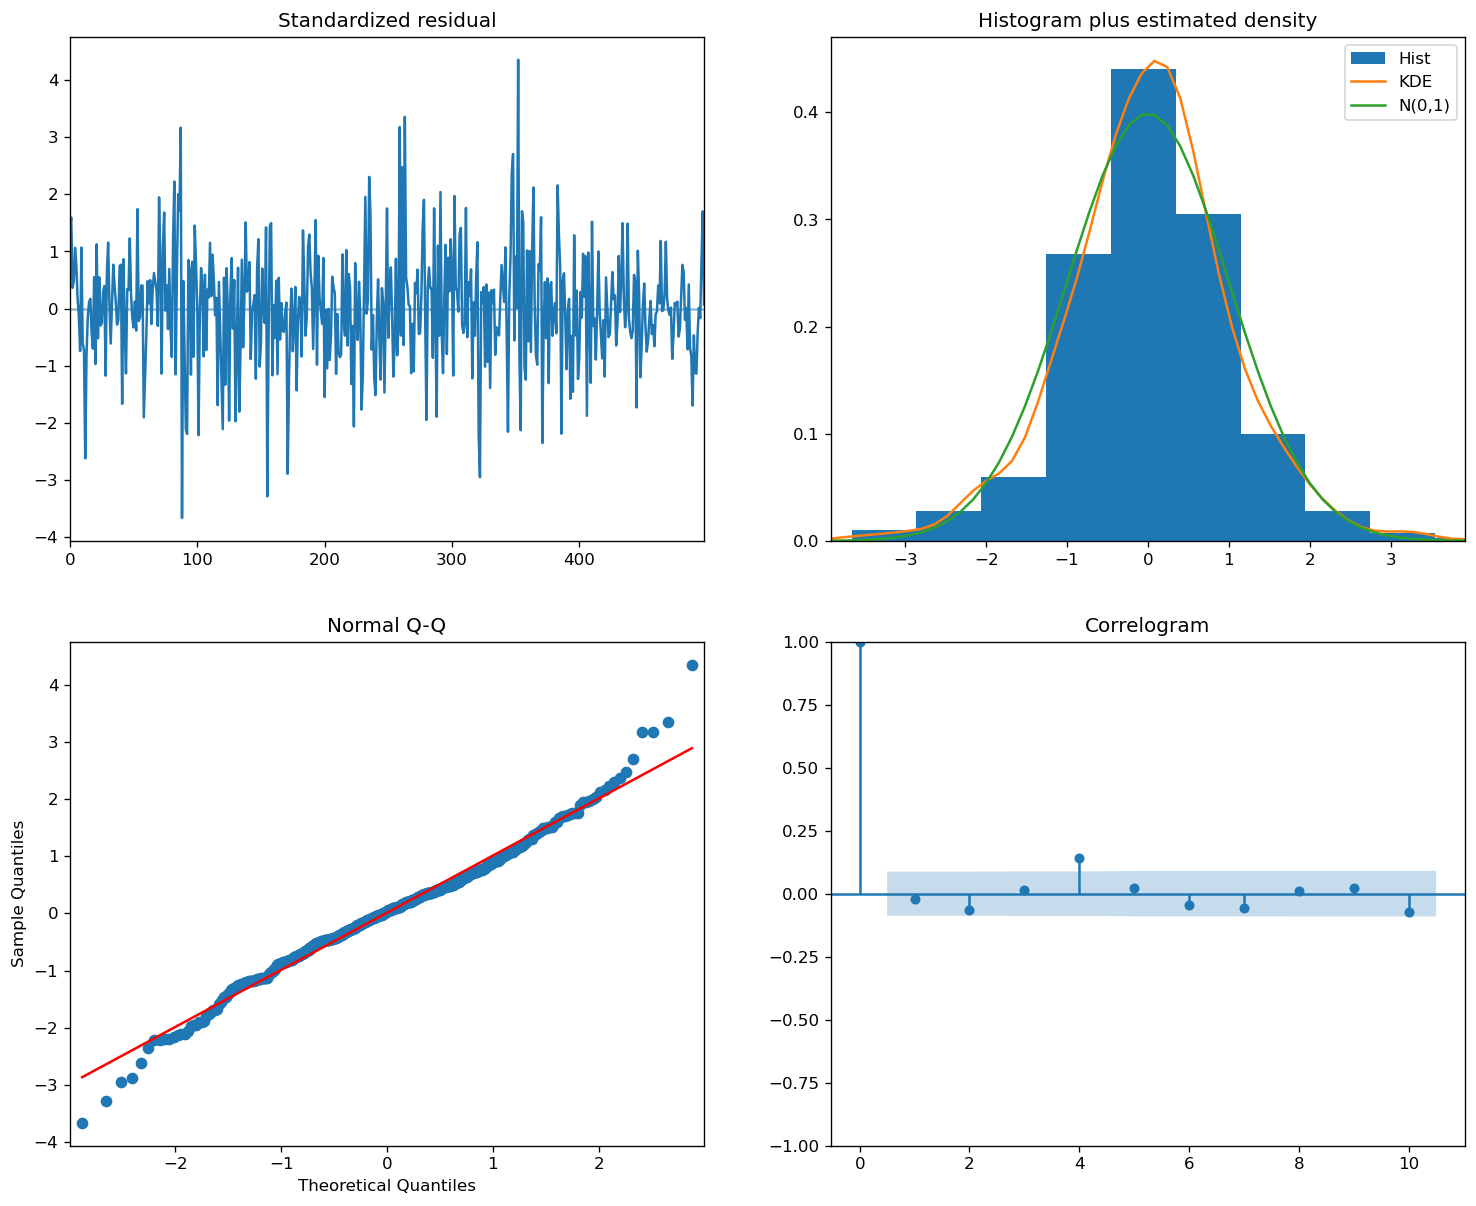

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


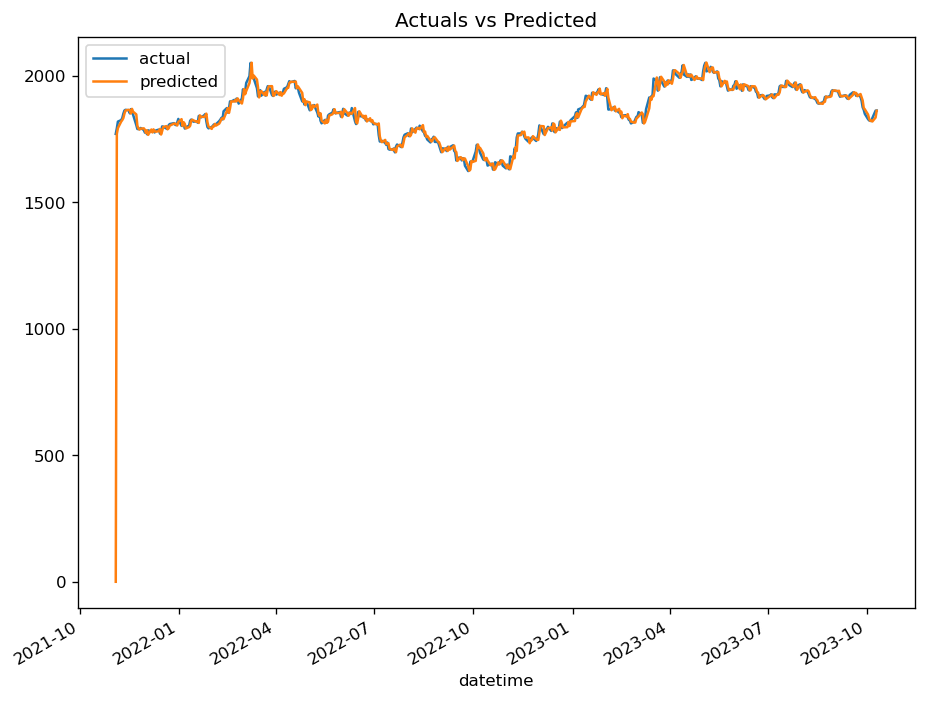

In [ ]:
# Actual vs Fitted Plot

model = ARIMA(df.close, order=(1,1,1))
model_fit = model.fit()

actual = df.close
predicted = model_fit.predict()
pd.DataFrame({'actual':actual, 'predicted':predicted}).plot(title='Actuals vs Predicted');

## __How to do find the optimal ARIMA model manually using Out-of-Time Cross validation__

Take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

First, create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio

In [ ]:
75/100 * 500

375.0

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.close[:375]
test = df.close[375:]

In [ ]:
print(train.shape, test.shape)

(375,) (125,)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  375
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1590.458
Date:                Wed, 11 Oct 2023   AIC                           3186.915
Time:                        00:07:54   BIC                           3198.688
Sample:                             0   HQIC                          3191.590
                                - 375                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9313      0.034    -27.002      0.000      -0.999      -0.864
ma.L1          0.9783      0.019     52.150      0.000       0.942       1.015
sigma2       288.9833     16.962     17.038      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

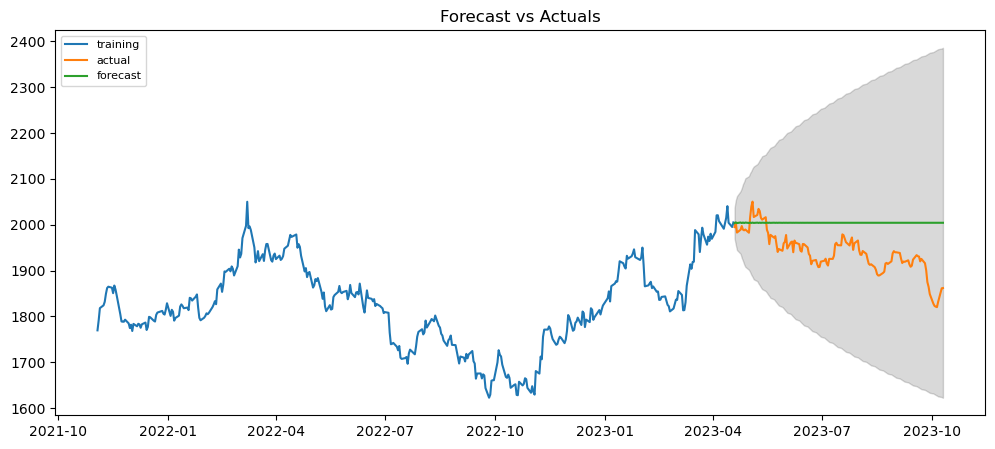

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()
print(fitted.summary())

# Forecast
n_steps = test.shape[0]
fc = fitted.forecast(n_steps, alpha=0.05)  # 95% conf
fc.index = test.index

# get forecast with updated
forecast = fitted.get_forecast(test.shape[0])

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)
conf.index = test.index

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)  # Use iloc to access the first column
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)  # Use iloc to access the second column

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.03522792207338025,
 'me': 64.08453722197679,
 'mae': 67.4259331361813,
 'mpe': 0.03358366558143691,
 'rmse': 78.14264350901875,
 'acf1': 0.9433300711937881,
 'corr': -0.006032447171946246,
 'minmax': 0.033630267597069}

## <center>SARIMAX Model Selection</center>

Now let's practice adding in an exogenous variable. In this example, I am simply going to add the month number as an exogenous variable, but this is not super useful as this is already conveyed through the seasonality.

Note that we are adding additional square brackets around the data being passed into the SARIMAX model.

In [ ]:
now = datetime.now()
print("now =", now)
data2=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=500)
data2

now = 2023-10-11 00:07:54.367797


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-11-03 04:00:00,OANDA:XAUUSD,1788.000,1788.285,1758.890,1769.690,65614.0
2021-11-04 04:00:00,OANDA:XAUUSD,1769.690,1798.950,1769.645,1791.780,49706.0
2021-11-05 04:00:00,OANDA:XAUUSD,1791.780,1818.360,1785.060,1818.170,60851.0
2021-11-08 05:00:00,OANDA:XAUUSD,1818.170,1826.515,1812.495,1824.220,41143.0
2021-11-09 05:00:00,OANDA:XAUUSD,1824.220,1832.760,1819.190,1831.910,45955.0
...,...,...,...,...,...,...
2023-10-04 04:00:00,OANDA:XAUUSD,1822.905,1830.675,1816.640,1821.315,168620.0
2023-10-05 04:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-06 04:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0


In [ ]:
df2 = data2['close']
df2 = pd.DataFrame(df2)
df2.head(5)

,close
datetime,
2021-11-03 04:00:00,1769.69
2021-11-04 04:00:00,1791.78
2021-11-05 04:00:00,1818.17
2021-11-08 05:00:00,1824.22
2021-11-09 05:00:00,1831.91


In [ ]:
#adding exogenous variable
df2['month_index'] = df2.index.month
df2.head(5)

,close,month_index
datetime,,
2021-11-03 04:00:00,1769.69,11
2021-11-04 04:00:00,1791.78,11
2021-11-05 04:00:00,1818.17,11
2021-11-08 05:00:00,1824.22,11
2021-11-09 05:00:00,1831.91,11


In [ ]:
# SARIMAX Model
SARIMAX_model = pm.auto_arima(df2[['close']], exogenous=df2[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5309.359, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4323.708, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4870.892, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5307.386, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4443.948, Time=0.08 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4245.480, Time=1.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=5303.828, Time=1.94 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4247.428, Time=2.45 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4247.426, Time=2.21 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=4868.517, Time=2.43 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=4246.814, Time=5.18 sec
 ARIMA(1,0,0)(2,1,0)[12]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  500
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2117.742
Date:                            Wed, 11 Oct 2023   AIC                           4243.483
Time:                                    00:08:26   BIC                           4260.244
Sample:                                         0   HQIC                          4250.067
                                            - 500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9603      0.011     83.975      0.000       0.938       0.983
ar.S.L12      -0.6775      0.042    -16.301      0.000      -0.759      -0.596
ar.S.L24      -0.3948      0.043     -9.285      0.000      -0.478      -0.311
sigma2       339.5322     18.318     18.535      0.000     303.629     375.435
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.90
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.09
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

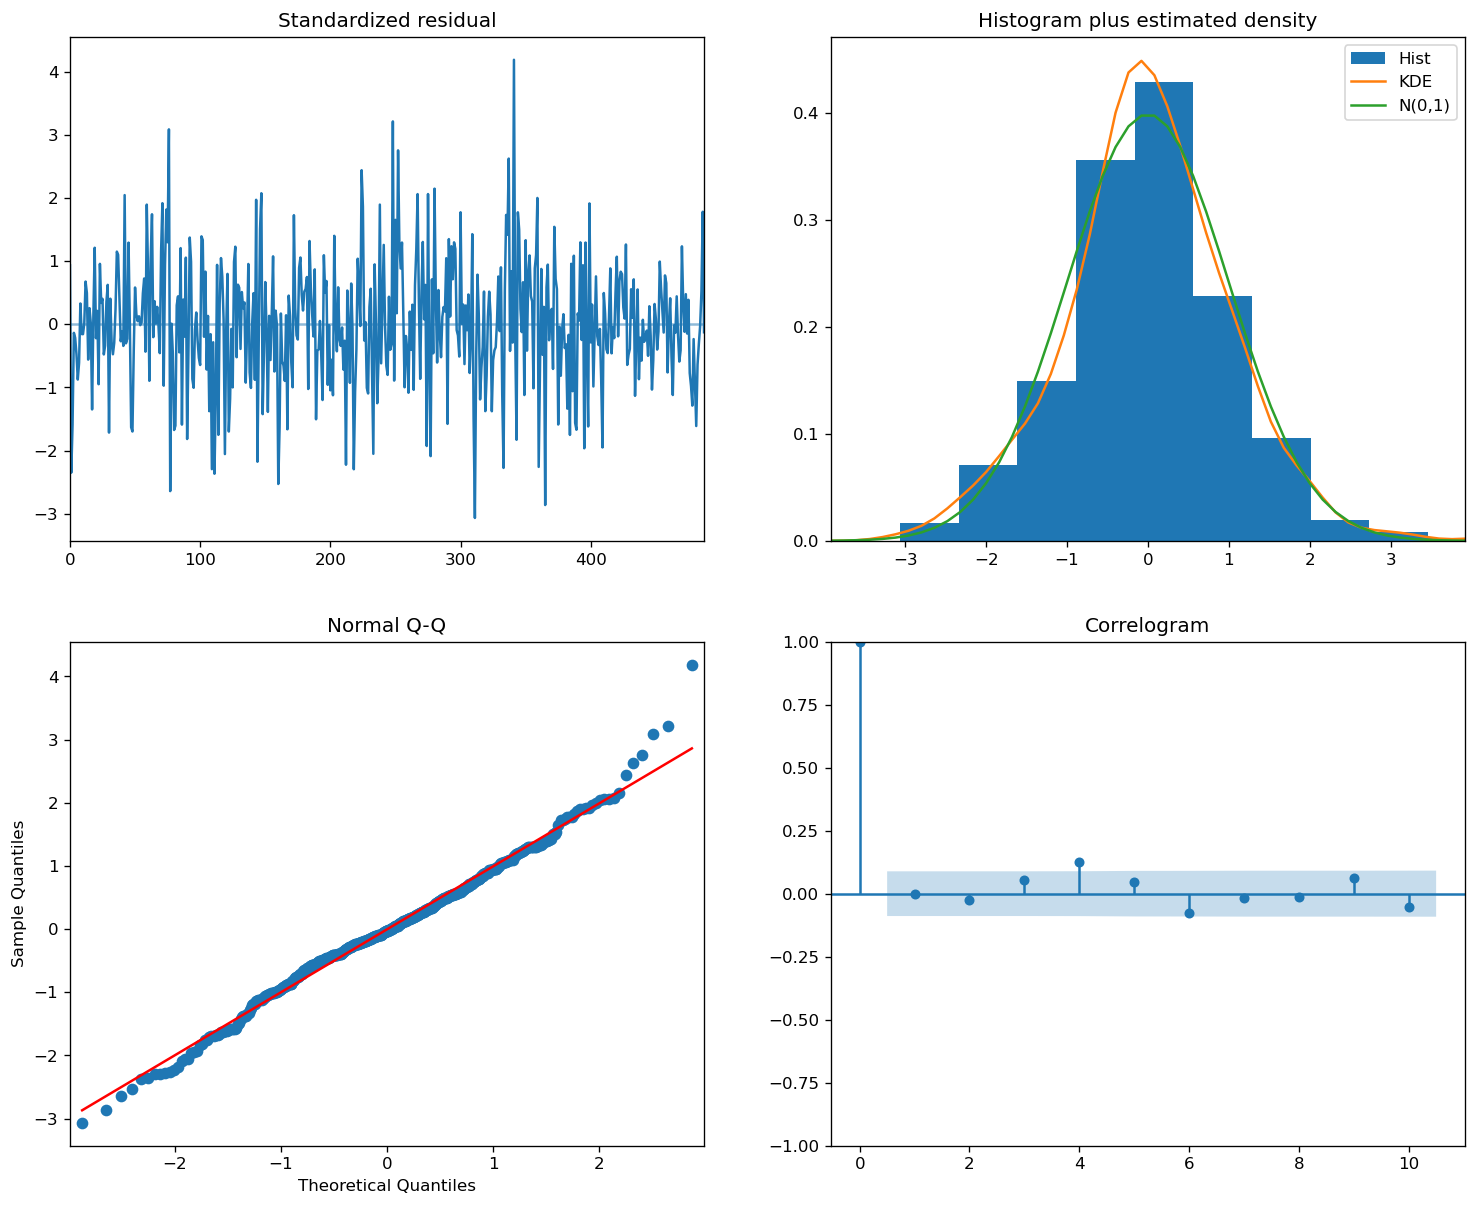

In [ ]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train2 = df.close[:375]
test2 = df.close[375:]

print(train2.shape, test2.shape)

(375,) (125,)


                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  375
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1596.000
Date:                            Wed, 11 Oct 2023   AIC                           3199.999
Time:                                    00:21:07   BIC                           3215.577
Sample:                                         0   HQIC                          3206.191
                                            - 375                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9650      0.013     72.668      0.000       0.939       0.991
ar.S.L12      -0.6879      0.051   

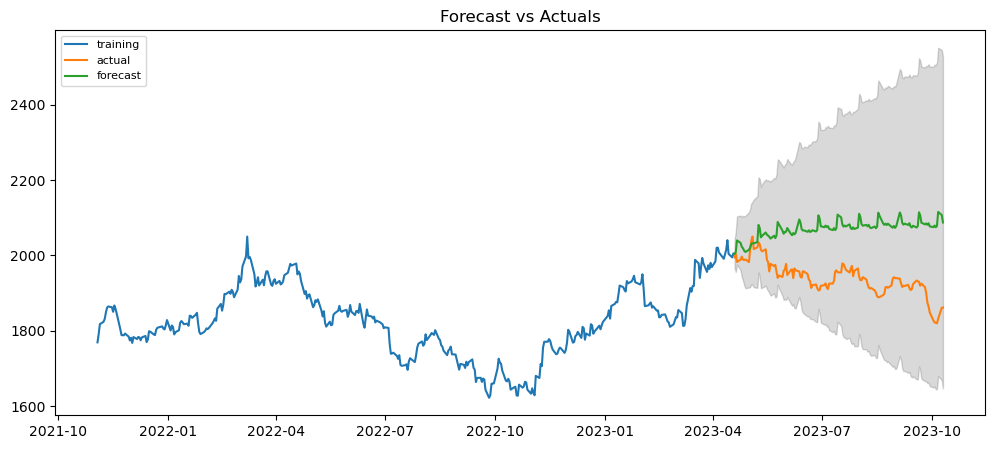

In [ ]:
import statsmodels.api as sm

# Build Model
model = sm.tsa.SARIMAX(train2, order=(1,0,0), seasonal_order=(2,1,0,12))
fitted = model.fit()
print(fitted.summary())

# Forecast
n_steps = test2.shape[0]
fc = fitted.forecast(n_steps, alpha=0.05)  # 95% conf
fc.index = test2.index

# get forecast with updated
forecast = fitted.get_forecast(test2.shape[0])

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)
conf.index = test2.index

# Make as pandas series
fc_series = pd.Series(fc, index=test2.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test2.index)  # Use iloc to access the first column
upper_series = pd.Series(conf.iloc[:, 1], index=test2.index)  # Use iloc to access the second column

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2, label='training')
plt.plot(test2, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test2.values)

{'mape': 0.06835161953582972,
 'me': 130.78388048879708,
 'mae': 131.21151875868196,
 'mpe': 0.06814270182924805,
 'rmse': 144.4188256178913,
 'acf1': 0.9245518335240389,
 'corr': -0.6023700777639923,
 'minmax': 0.06310179062347954}

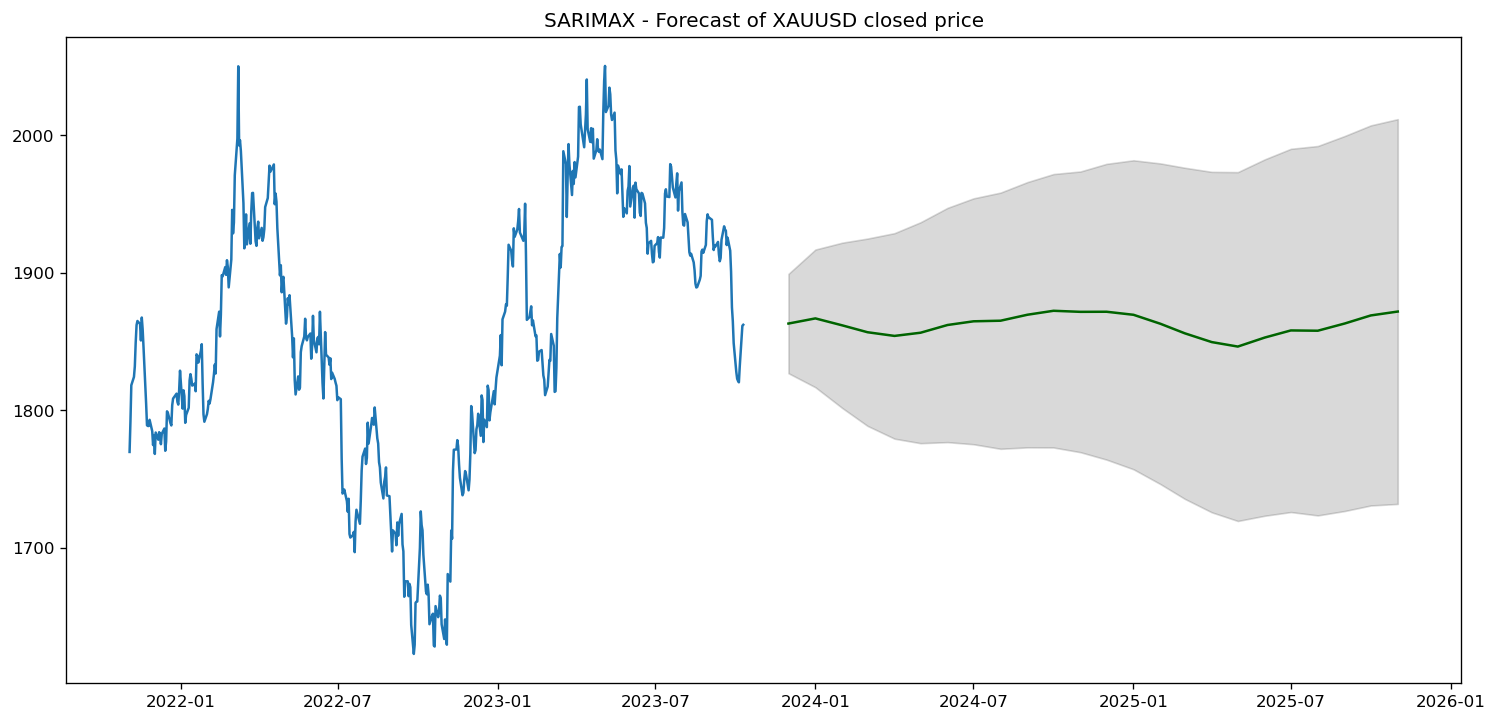

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df2.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df2.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df2.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted.index = index_of_fc
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df2["close"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of XAUUSD closed price")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)